<a href="https://colab.research.google.com/github/akmal1994/Online_Retail_customer_segment/blob/main/Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Online Retail Customer Segmentation

##### **Project Type**    - Unsupervised Learning
##### **Contribution**    - Individual
##### **Team Member**     - Akmal Jah Quamri

# **Project Summary -**
Customer segmentation is the process by which you divide your customers up based on common characteristics – such as demographics or behaviors, so you can market to those customers more effectively. These customer segmentation groups can also be used to begin discussions of building a marketing persona. This is because customer segmentation is typically used to inform a brand’s messaging, positioning and to improve how a business sells – so marketing personas need to be closely aligned to those customer segments in order to be effective.

# **GitHub Link -**
https://github.com/akmal1994/Bike-Rental-count/blob/main/Retail_Customer_Segmentation.ipynb

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
data = pd.read_excel('/content/drive/MyDrive/Alma Better/0. Capstone Projects/Unsupervised Learning/Online Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Basic Exploratory Data Analysis

## Statistical Analysis

In [3]:
# To check the number of rows and columns of our dataset
data.shape

(541909, 8)

**Our dataset is having 541909 rows and 8 columns**

---

In [4]:
# To check the complete information about dataset such as: types of columns, name of columns, non-null counts for each columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**Here we can see that column `CustomerID` is having 406829 values and `Description` with 540455 values, apart from this every column is having 0 non-null values.**

---

In [5]:
# To check the null values percent for each columns
df = data.copy()
((df.isna().sum())/len(df))*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

**`CustomerID` have 25 percent of null values and `Description` have 0.27 percent of null values. Now here I want to know whether all null values in `Description` is correspond with null values of `CustomerID` or not.**

---

In [6]:
non_null = df[df['CustomerID'].notna()]
((non_null.isna().sum())/len(non_null))*100

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

**When we checked the null values after omitting the rows having null values in `CustomerID` column, we observed that `Description` column with null values are also covered.**

---

In [15]:
non_null.shape

(406829, 8)

**We have now 406829 rows and 8 columns**

In [14]:
non_null.duplicated().sum()

5225

**We can see that their are many duplicate rows as well. Let's do a check for dkuplicates now**

In [16]:
# we have to drop some InvoiceNo which are starts with 'c' because 'c', it indicates a cancellation
non_null['InvoiceNo'] = non_null['InvoiceNo'].astype('str')
new_data=non_null[~non_null['InvoiceNo'].str.contains('C')] # Create a new dataset

# After removing cancellation data let's check duplicate rows in new dataset
new_data.duplicated().sum()

5192

**After removing cancellation datapoints we still have duplicate datapoints in our dataset.**

In [17]:
# Keep all the records for non duplicate data points in a new variable
clear_data = new_data[~new_data.duplicated()]
clear_data.duplicated().sum()

0

**Now we have clear dataset with zero null values, zero duplicates and no cancellation records.**

In [19]:
# Data Summarizing
clear_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,392732.0,13.153718,181.588420,1.0,2.00,6.00,12.00,80995.00
UnitPrice,392732.0,3.125596,22.240725,0.0,1.25,1.95,3.75,8142.75
CustomerID,392732.0,15287.734822,1713.567773,12346.0,13955.00,15150.00,16791.00,18287.00


**OBSERVATIONS:**

* if we see `Quantity` and `UnitPrice` column then we can see that at 75th percentile value is 12 and 3.75, however at maximum values are 80995 and 8142. With this possibly there might be outliers with this columns.

## Visual Inspection / Representation

In this section we will try to plot different graphs and if required any operations we will try to do.

In [54]:
data_desc=clear_data['Description'].value_counts().reset_index()
data_desc.rename(columns={'index': 'Description_Name', 'Description': 'Count'}, inplace=True)
data_desc.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1714
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1390


In [55]:
# Create a function to plot
def plot(x, y, df, num1, num2, title_name):
  plt.figure(figsize=(18,11))
  plt.title(title_name)
  sns.barplot(x=x,y=y,data=df[num1:num2])

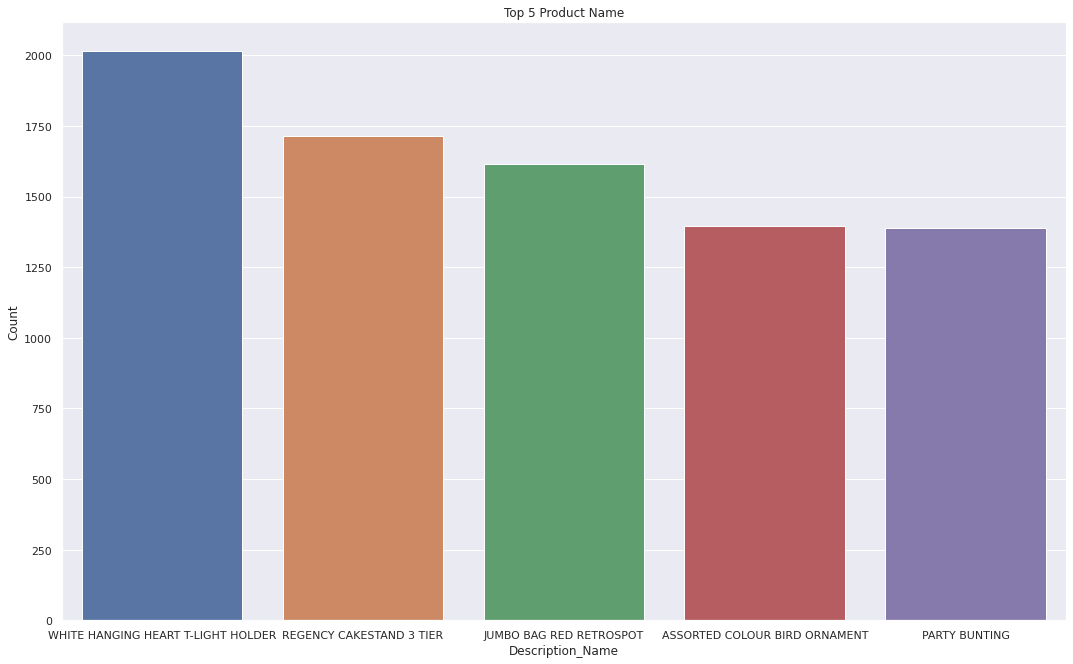

In [56]:
plot('Description_Name', 'Count', data_desc, 0, 5, 'Top 5 Product Name')

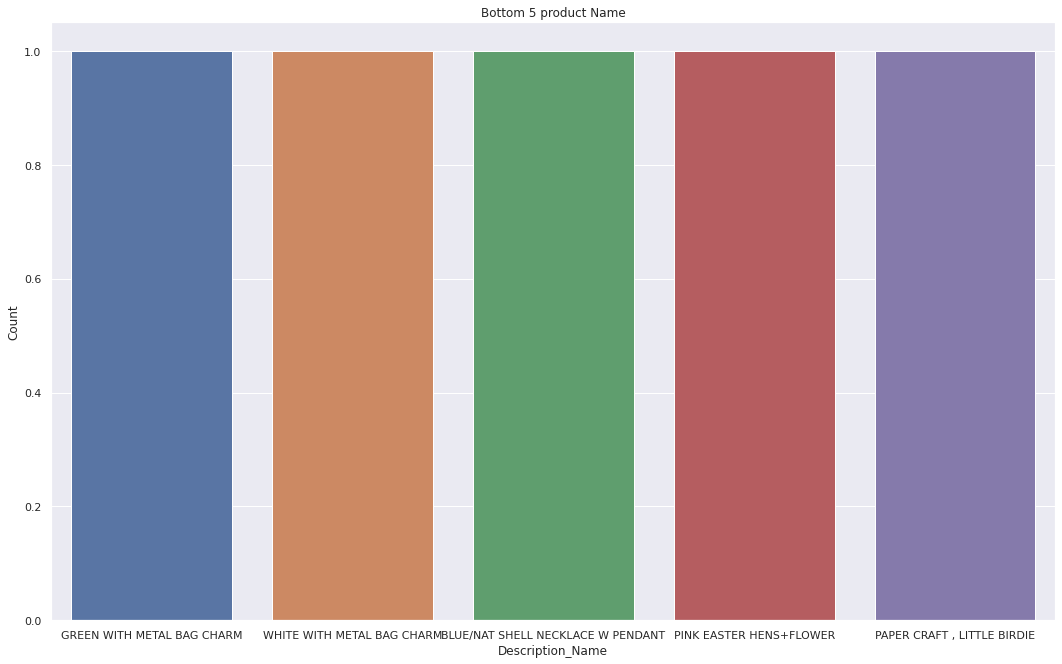

In [57]:
plot(x='Description_Name', y='Count', df=data_desc, num1=-5, num2=len(data_desc), title_name='Bottom 5 product Name')

In [58]:
data_stock=clear_data['StockCode'].value_counts().reset_index()
data_stock.rename(columns={'index': 'Stock_Code', 'StockCode': 'Count'}, inplace=True)
data_stock.head()

,Stock_Code,Count
0,85123A,2023
1,22423,1714
2,85099B,1615
3,84879,1395
4,47566,1390


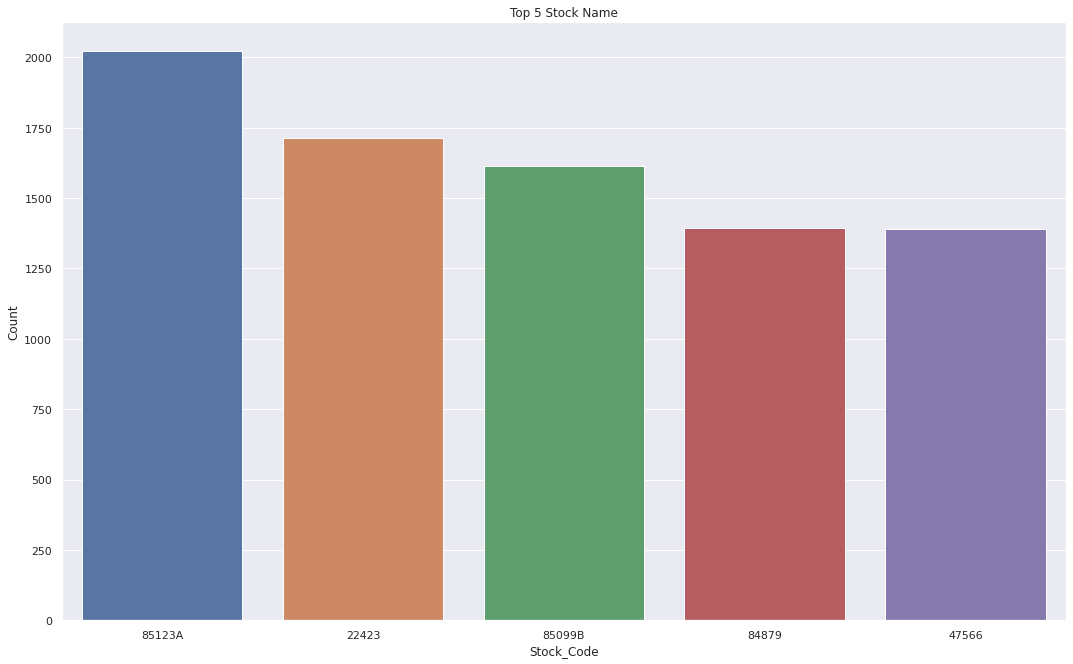

In [59]:
plot(x='Stock_Code', y='Count', df=data_stock, num1=0, num2=5, title_name='Top 5 Stock Name')

In [60]:
data_stock.tail()

,Stock_Code,Count
3660,20678,1
3661,90059D,1
3662,90168,1
3663,90169,1
3664,23843,1


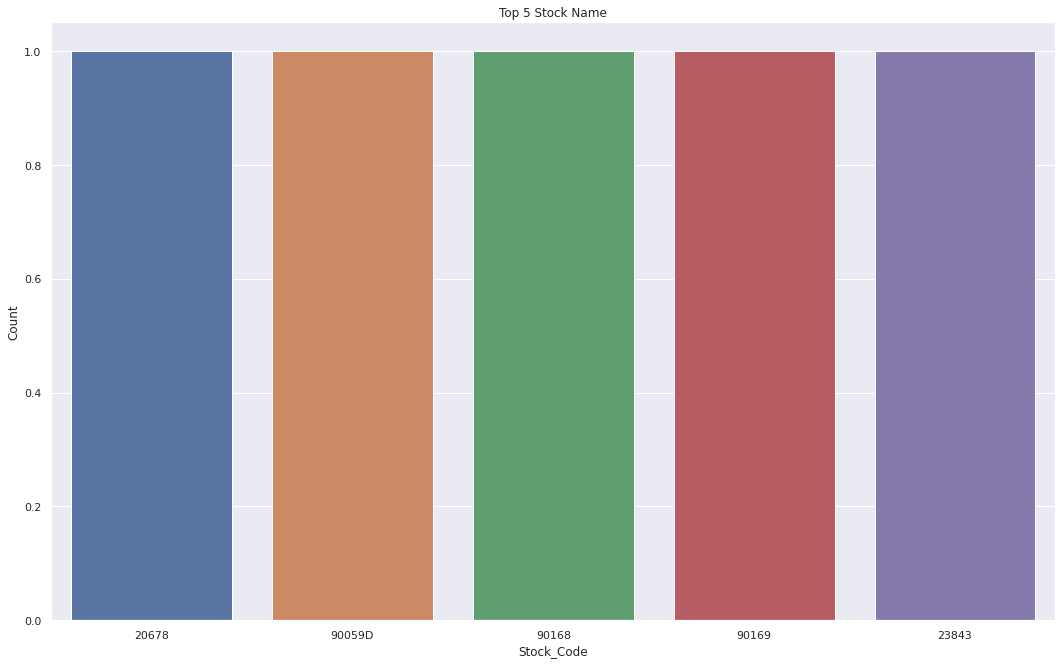

In [61]:
plot(x='Stock_Code', y='Count', df=data_stock, num1=-5, num2=len(data_stock), title_name='Top 5 Stock Name')

In [62]:
data_loc=clear_data['Country'].value_counts().reset_index()
data_loc.rename(columns={'index': 'Country_Name', 'Country': 'Count'}, inplace=True)
data_loc.head()

,Country_Name,Count
0,United Kingdom,349227
1,Germany,9027
2,France,8327
3,EIRE,7228
4,Spain,2480


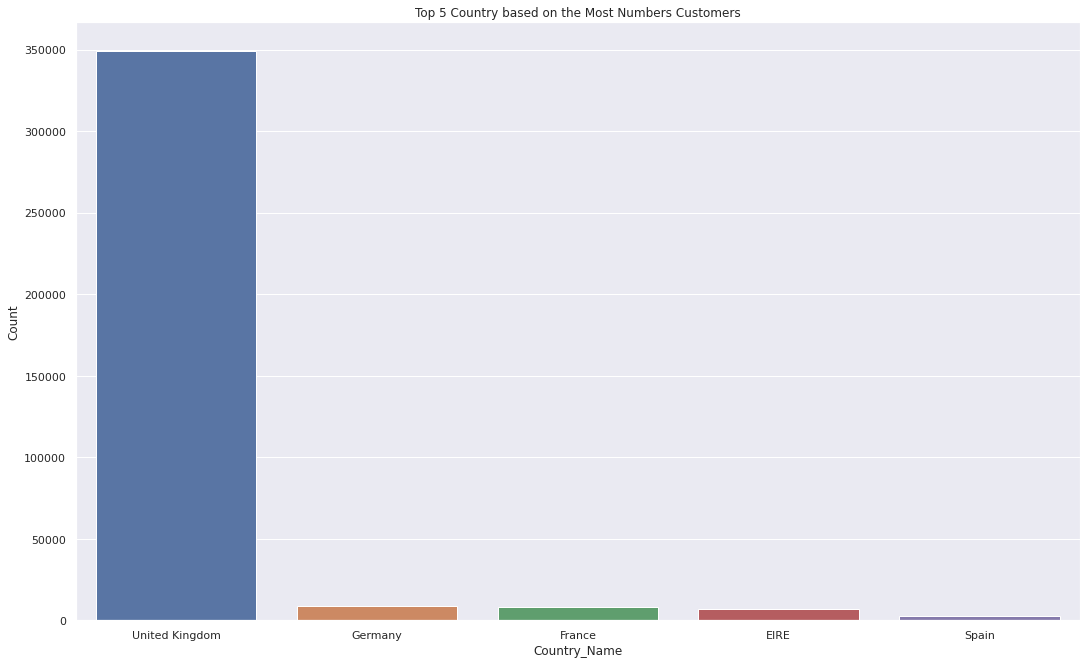

In [65]:
plot('Country_Name', 'Count', data_loc, 0, 5, 'Top 5 Country based on the Most Numbers Customers')

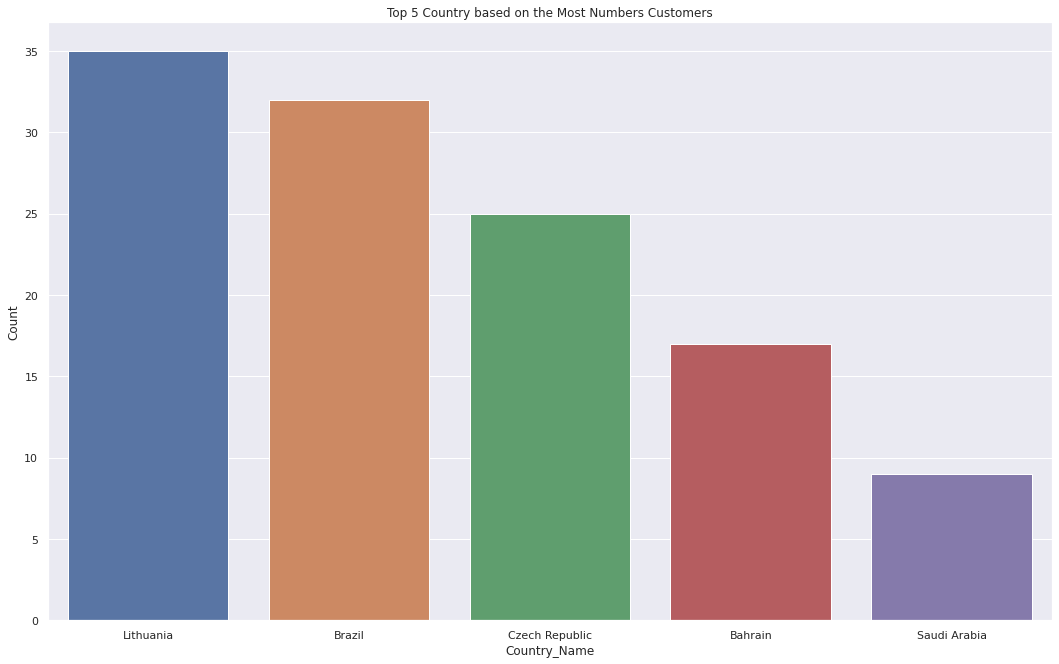

In [66]:
plot('Country_Name', 'Count', data_loc, -5, len(data_loc), 'Top 5 Country based on the Most Numbers Customers')